# This portfolio project based on movie industry ,I downloaded movies dataset from kaggle

# Sorting the movies according to the gross from the highest to the lowest 


In [4]:
# First let's import the packages we will use in this project
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
#plt.style.use('ggplot')
#from matplotlib.pyplot import figure

#%matplotlib inline
#matplotlib.rcParams['figure.figsize'] = (12,8)

#pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'D:\Data Analysis\movies.csv')
df_sorted = df.sort_values(by='gross', ascending=False)
df_sorted

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   
...                                          ...    ...     ...   ...   
7663                                More to Life    NaN   Drama  2020   
7664                                 Dream Round    NaN  Comedy  2020   
7665                               Saving Mbango    NaN   Drama  2020   
7666                                It's Just Us    NaN   Drama  2020   
7667                                   Tee em el    NaN  Horror  2020   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   
...                                 ...    ...        ...            ...   
7663   October 23, 2020 (United States)    3.1       18.0  Joseph Ebanks   
7664   February 7, 2020 (United States)    4.7       36.0   Dusty Dukatz   
7665          April 27, 2020 (Cameroon)    5.7       29.0   Nkanya Nkwai   
7666    October 1, 2020 (United States)    NaN        NaN  James Randall   
7667    August 19, 2020 (United States)    5.7        7.0   Pereko Mosia   

                  writer               star        country       budget  \
5445       James Cameron    Sam Worthington  United States  237000000.0   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000.0   
3045       James Cameron  Leonardo DiCaprio  United States  200000000.0   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000.0   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000.0   
...                  ...                ...            ...          ...   
7663       Joseph Ebanks       Shannon Bond  United States       7000.0   
7664         Lisa Huston   Michael Saquella  United States          NaN   
7665        Lynno Lovert       Onyama Laura  United States      58750.0   
7666       James Randall      Christina Roz  United States      15000.0   
7667        Pereko Mosia   Siyabonga Mabaso   South Africa          NaN   

             gross                    company  runtime  
5445  2.847246e+09      Twentieth Century Fox    162.0  
7445  2.797501e+09             Marvel Studios    181.0  
3045  2.201647e+09      Twentieth Century Fox    194.0  
6663  2.069522e+09                  Lucasfilm    138.0  
7244  2.048360e+09             Marvel Studios    149.0  
...            ...                        ...      ...  
7663           NaN                        NaN     90.0  
7664           NaN  Cactus Blue Entertainment     90.0  
7665           NaN           Embi Productions      NaN  
7666           NaN                        NaN    120.0  
7667           NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

# Drawing a line chart to represent the budget and the gross of movies over the years

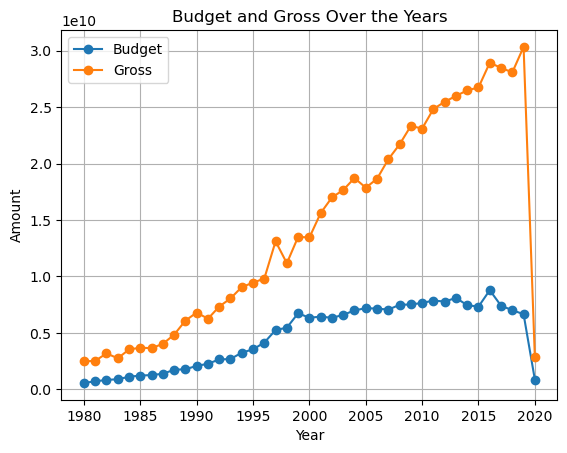

In [4]:
import matplotlib.pyplot as plt

sel_columns = ['year', 'gross', 'budget']

# Select the columns of interest
selected_df = df[sel_columns]
grouped_df = selected_df.groupby('year').agg({
    'gross': 'sum',                # Total gross per year
    'budget': 'sum'})              # Total budget per year

# Reset the index to make 'year' a regular column
grouped_df = grouped_df.reset_index()

# Line plot for budget
plt.plot(grouped_df['year'], grouped_df['budget'], marker='o', linestyle='-', label='Budget')

# Line plot for gross
plt.plot(grouped_df['year'], grouped_df['gross'], marker='o', linestyle='-', label='Gross')

plt.title('Budget and Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend()  # Show legend
plt.grid(True)
plt.show()


# A map to display the number of movies produced by each country from 1980 to 2020(hover with the mouse to display the data)

In [3]:
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut  # Import GeocoderTimedOut

# Select columns of interest
sel_columns = ['country', 'name']
selected_df = df[sel_columns]

# Group the data by country and count the number of movies
grouped_df = selected_df.groupby('country').agg({'name': 'count'}).reset_index()
grouped_df.columns = ['Country', 'Movie Count']  # Rename columns for clarity

# Create a folium map centered on a specific location
m = folium.Map(location=[0, 0], zoom_start=2)

# Create a geocoder object
geolocator = Nominatim(user_agent="movie_map")

# Add markers for each country
for idx, row in grouped_df.iterrows():
    country = row['Country']
    count = row['Movie Count']
    try:
        # Use geocoding to obtain latitude and longitude coordinates for the country
        location = geolocator.geocode(country)
        if location:
            # Construct tooltip text with both country name and movie count
            tooltip_text = f'{country}: {count} movies'
            # Add marker with popup displaying country name
            marker = folium.Marker(location=[location.latitude, location.longitude], 
                                    popup=country)
            # Add tooltip displaying both country name and movie count
            folium.Tooltip(tooltip_text).add_to(marker)
            marker.add_to(m)
    except GeocoderTimedOut:
        print(f"Geocoding service timed out for {country}. Skipping...")

# Display the map
m


# A pie chart represents the ratio of movies in each genre

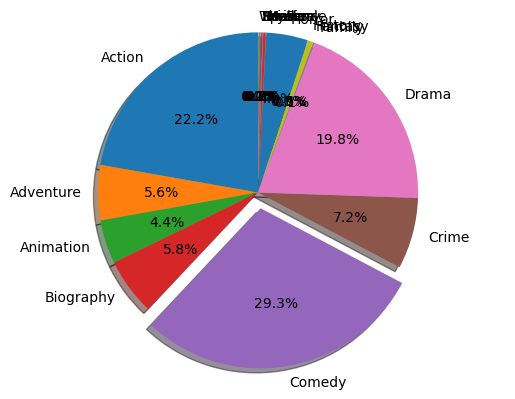

In [8]:
import matplotlib.pyplot as plt

sel_columns = ['genre', 'name']

# Select the columns of interest
selected_df = df[sel_columns]
grouped_df = selected_df.groupby('genre').agg({
    'name': 'count'})  # Total movies of each genre

# Reset the index to make 'genre' a regular column
grouped_df = grouped_df.reset_index()

# Pie chart
labels = grouped_df['genre']
sizes = grouped_df['name']
explode = [0.1 if label == 'Comedy' else 0 for label in labels]  # Explode 'Action' slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


# Per each year No. of movies and their gross ,budjet,countries,companies

In [28]:
# Assuming df is your DataFrame and sel_columns contains the selected columns
sel_columns = ['year', 'name', 'genre', 'gross', 'budget', 'country', 'company']

# Select the columns of interest
selected_df = df[sel_columns]

# Drop rows with NaN values in the 'country' and 'company' columns
selected_df = selected_df.dropna(subset=['country', 'company'])

# Set display options to allow wrapping of data
pd.set_option('display.max_colwidth', 1000)  # Set a large enough value for wrapping

# Group by year and aggregate the data
grouped_df = selected_df.groupby('year').agg({
    'name': 'count',               # Count of movies per year
    'gross': 'sum',                # Total gross per year
    'budget': 'sum',               # Total budget per year
    'country': lambda x: ' | '.join(x.unique()),    # List of unique countries per year, separated by comma
    'company': lambda x: ' | '.join(x.unique())     # List of unique companies per year, separated by comma
})

# Rename the 'name' column to 'count' for clarity
grouped_df = grouped_df.rename(columns={'name': 'count'})

# Display the DataFrame
grouped_df


count         gross        budget  \
year                                      
1980     92  2.483667e+09  5.688500e+08   
1981    113  2.520065e+09  7.094500e+08   
1982    126  3.187581e+09  8.366700e+08   
1983    141  2.744441e+09  8.938756e+08   
1984    167  3.530405e+09  1.116105e+09   
1985    200  3.691509e+09  1.220510e+09   
1986    198  3.644410e+09  1.264787e+09   
1987    200  4.033434e+09  1.382543e+09   
1988    200  4.840386e+09  1.730540e+09   
1989    197  6.080557e+09  1.776763e+09   
1990    199  6.802726e+09  2.072503e+09   
1991    200  6.254771e+09  2.268248e+09   
1992    200  7.334168e+09  2.648378e+09   
1993    200  8.053959e+09  2.685350e+09   
1994    200  9.062926e+09  3.250455e+09   
1995    200  9.448305e+09  3.544834e+09   
1996    200  9.819528e+09  4.144580e+09   
1997    200  1.311228e+10  5.256145e+09   
1998    200  1.117602e+10  5.462266e+09   
1999    200  1.350964e+10  6.742940e+09   
2000    200  1.345413e+10  6.340250e+09   
2001    200  1.561763e+10  6.446300e+09   
2002    200  1.700344e+10  6.335629e+09   
2003    200  1.766193e+10  6.598430e+09   
2004    200  1.872175e+10  6.997327e+09   
2005    200  1.786661e+10  7.189494e+09   
2006    200  1.865407e+10  7.156700e+09   
2007    200  2.038367e+10  7.065510e+09   
2008    200  2.170216e+10  7.486730e+09   
2009    200  2.333868e+10  7.522500e+09   
2010    198  2.310660e+10  7.652750e+09   
2011    200  2.483769e+10  7.868730e+09   
2012    200  2.547619e+10  7.777295e+09   
2013    200  2.599585e+10  8.101670e+09   
2014    200  2.649148e+10  7.454300e+09   
2015    200  2.674601e+10  7.329126e+09   
2016    200  2.893884e+10  8.786500e+09   
2017    200  2.848525e+10  7.409700e+09   
2018    200  2.808529e+10  7.012980e+09   
2019    198  3.033950e+10  6.656050e+09   
2020     21  2.822480e+09  8.629338e+08   

                                                                                                                                                                                                                                                                     country  \
year                                                                                                                                                                                                                                                                           
1980                                                                                                                                   United Kingdom | United States | South Africa | West Germany | Canada | Australia | Libya | Italy | Soviet Union | France | Hong Kong   
1981                                                                                                                                                                       United States | United Kingdom | Canada | Australia | West Germany | France | Italy | South Korea   
1982                                                                                                                           United States | Canada | United Kingdom | Australia | Sweden | Spain | Hong Kong | Mexico | Switzerland | West Germany | France | Netherlands   
1983                                                                                                                                                                  United States | France | United Kingdom | Canada | Italy | Mexico | New Zealand | Philippines | Israel   
1984                                                                                                                               United Kingdom | United States | Italy | West Germany | Mexico | Japan | Hong Kong | France | Soviet Union | Australia | Canada | Hungary   
1985                                                               United States | United Kingdom | Japan | Netherlands | Australia | Hong Kong | Brazil | New Zealand | Yugoslavia | Sweden | France | Argentina | Taiwan | South Korea | Canada | Mexico |

# Piovet Table
# No. of movies produced by contries each year

In [36]:
sel_columns = ['year', 'name', 'country']
pd.set_option('display.max_columns', None)

# Select the columns of interest
selected_df = df[sel_columns]

# Group by year and country, and count the number of movies for each country per year
grouped_df = selected_df.groupby(['year', 'country']).size().unstack(fill_value=0)

# Rename the index and columns for clarity
grouped_df.index.name = 'Year'
grouped_df.columns.name = 'Country'

# Display the pivot table
grouped_df


Country  Argentina  Aruba  Australia  Austria  Belgium  Brazil  Canada  Chile  \
Year                                                                            
1980             0      0          1        0        0       0       2      0   
1981             0      0          3        0        0       0       6      0   
1982             0      0          3        0        0       0       4      0   
1983             0      0          0        0        0       0      10      0   
1984             0      0          2        0        0       0       2      0   
1985             1      0          2        0        0       1       4      0   
1986             1      0          3        0        0       0       7      0   
1987             0      0          1        0        0       0       3      0   
1988             0      0          4        0        0       0       6      0   
1989             0      0          3        0        0       0       7      0   
1990             0      0          2        0        0       0       4      0   
1991             0      0          3        0        0       0       3      0   
1992             0      0          6        0        1       0       2      0   
1993             0      0          1        1        0       0       2      0   
1994             0      0          4        0        0       0       2      0   
1995             0      0          1        0        0       0       6      0   
1996             0      0          2        0        0       0       5      0   
1997             0      0          2        0        0       0       5      0   
1998             0      1          3        0        0       1       6      0   
1999             0      0          1        0        0       0       4      0   
2000             1      0          4        0        0       0       5      0   
2001             1      0          3        0        0       0       6      0   
2002             0      0          2        0        0       1       4      0   
2003             0      0          1        0        0       1       6      0   
2004             1      0          1        0        0       0       1      0   
2005             0      0          3        0        0       0       7      0   
2006             0      0          1        0        0       0       8      0   
2007             0      0          1        1        0       1       3      0   
2008             0      0          0        0        1       1       2      0   
2009             1      0          1        0        1       0       3      0   
2010             0      0          1        0        0       0       4      0   
2011             0      0          4        0        1       0       5      0   
2012             0      0          1        1        1       0       3      0   
2013             0      0          3        0        1       0       5      0   
2014             1      0          5        1        2       0       4      0   
2015             0      0          3        0        0       0       9      1   
2016             0      0          3        0        0       0       6      0   
2017             0      0          2        0        0       0       3      0   
2018             0      0          5        0        0       0       9      1   
2019             1      0          1        1        0       0       5      0   
2020             0      0          0        0        0       0       2      0   

Country  China  Colombia  Czech Republic  Denmark  \
Year                                                
1980         0         0               0        0   
1981         0         0               0        0   
1982         0         0               0        0   
1983         0         0               0        0   
1984         0         0               0        0   
1985         0         0               0        0   
1986         0         0               0        1   
1987         0         0               

# The user enters the year to show bar chart for the No. of movies produced by each country in this year

Enter the year: 1999


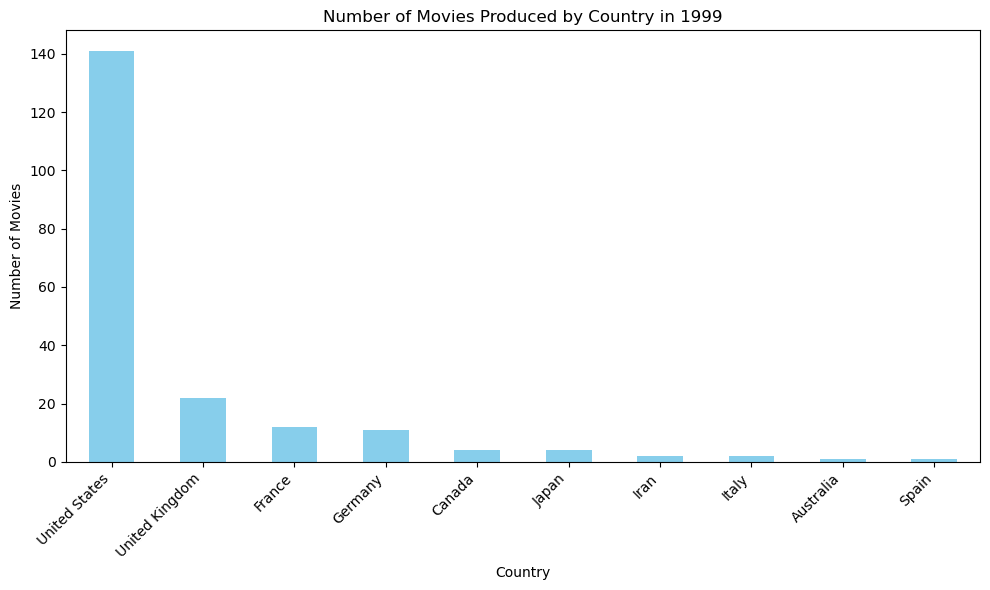

In [43]:
import matplotlib.pyplot as plt
#-------------
sel_columns = ['year', 'name', 'country']
pd.set_option('display.max_columns', None)

# Select the columns of interest
selected_df = df[sel_columns]

# Group by year and country, and count the number of movies for each country per year
grouped_df = selected_df.groupby(['year', 'country']).size().unstack(fill_value=0)
#-------------
# Prompt the user to input the year
year = int(input("Enter the year: "))

# Check if the input year exists in the index of the pivot table
if year in grouped_df.index:
    # Select data for the input year
    data = grouped_df.loc[year]
    
    # Filter out countries with zero counts
    data = data[data != 0]
    
    # Sort countries by count in descending order
    data = data.sort_values(ascending=False)
    
    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title(f"Number of Movies Produced by Country in {year}")
    plt.xlabel("Country")
    plt.ylabel("Number of Movies")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Year not found in the data.")


# Piovet Table
# Genre of movies produced each year

In [42]:
sel_columns = ['year', 'name', 'genre']
pd.set_option('display.max_columns', None)

# Select the columns of interest
selected_df = df[sel_columns]

# Group by year and country, and count the number of movies for each country per year
grouped_df = selected_df.groupby(['year', 'genre']).size().unstack(fill_value=0)

# Rename the index and columns for clarity
grouped_df.index.name = 'Year'
grouped_df.columns.name = 'genre'

# Display the pivot table
grouped_df


genre  Action  Adventure  Animation  Biography  Comedy  Crime  Drama  Family  \
Year                                                                           
1980       14          7          2          6      36      4     14       1   
1981       17         11          2          4      29      9     21       0   
1982       21          3          5          5      46      8     21       1   
1983       31          9          2          5      42      9     31       0   
1984       31         13          2          4      63      8     39       0   
1985       42         19          7          9      66      5     39       2   
1986       46         12          6          7      63     13     42       1   
1987       39          7          2          7      73     16     36       0   
1988       31         10          5          8      76     15     39       0   
1989       48         14          4         11      71     12     30       0   
1990       45         10          3          8      66     13     43       0   
1991       41          8          5          6      68     13     51       0   
1992       36         13          5         10      56     25     46       0   
1993       34         11          5         12      61     19     49       1   
1994       38         15          5         13      81     13     29       2   
1995       39         19          6          7      62     19     39       0   
1996       34         12          5         10      80     19     34       0   
1997       51          8          5          9      61     17     41       0   
1998       41          8          8          8      71     19     35       0   
1999       26          8          8         10      72     17     48       0   
2000       35         10         10          9      66     19     44       0   
2001       39          7         13          7      63     15     47       0   
2002       46          9          8          9      53     26     43       0   
2003       50         11          8          9      65     17     30       0   
2004       47          6         11         11      64     13     43       1   
2005       45         16          7         11      62     12     36       0   
2006       43         14         17         17      53     11     33       0   
2007       44          9         11         13      48     27     34       0   
2008       53         12         10         12      51     19     31       0   
2009       44         14         15         13      51     10     39       0   
2010       52         10         10         11      55     13     38       0   
2011       53          9         15         12      45      7     48       0   
2012       47         13         12          8      55     12     40       0   
2013       55         10         12         16      44     15     38       0   
2014       63         10         11         15      44      8     38       0   
2015       56          8         11         22      42      6     45       0   
2016       64          8         19         21      35     10     32       0   
2017       47          9         14         24      33     12     52       1   
2018       53         11         13         33      31     18     30       0   
2019       57         12         17         11      39      7     43       1   
2020        7          2          2          0       3      1      7       0   

genre  Fantasy  History  Horror  Music  Musical  Mystery  Romance  Sci-Fi  \
Year                                                                        
1980         1        0       6      0        0        0        0       1   
1981         0        0      17      1        0        0        1       0   
1982         1        0      11      0        0        0        0       2   
1983         1        1      10      0        0        0        0       1   
1984         0        0       7      0        0        0        1       0   
1985         2      

# Bar chart for different genre of movies in a specific year 

Enter the year: 2020


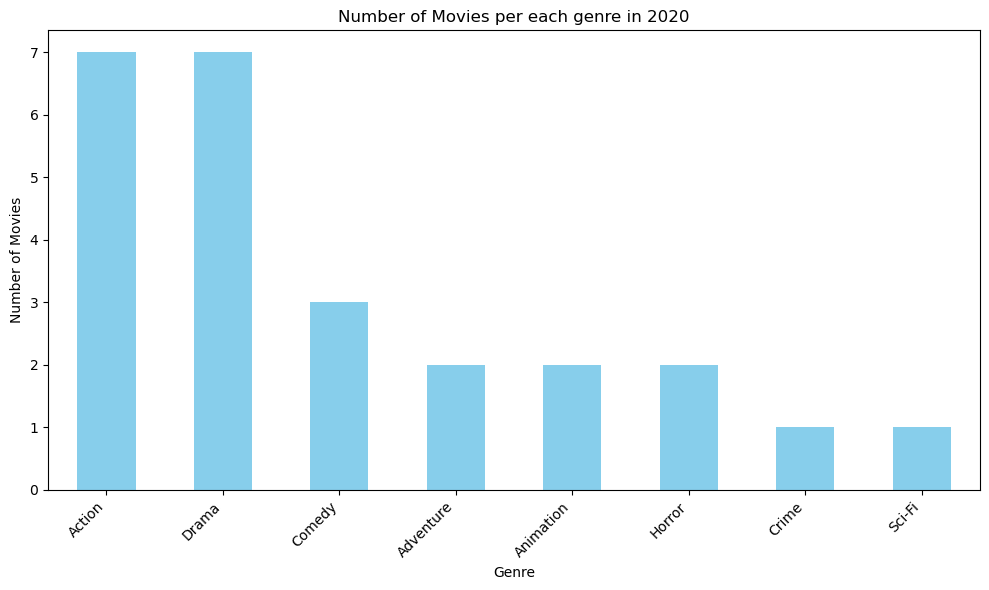

In [45]:
sel_columns = ['year', 'name', 'genre']
pd.set_option('display.max_columns', None)

# Select the columns of interest
selected_df = df[sel_columns]

# Group by year and country, and count the number of movies for each country per year
grouped_df = selected_df.groupby(['year', 'genre']).size().unstack(fill_value=0)
# Prompt the user to input the year
year = int(input("Enter the year: "))

# Check if the input year exists in the index of the pivot table
if year in grouped_df.index:
    # Select data for the input year
    data = grouped_df.loc[year]
    
    # Filter out countries with zero counts
    data = data[data != 0]
    
    # Sort countries by count in descending order
    data = data.sort_values(ascending=False)
    
    # Plot a bar chart
    plt.figure(figsize=(10, 6))
    data.plot(kind='bar', color='skyblue')
    plt.title(f"Number of Movies per each genre in {year}")
    plt.xlabel("Genre")
    plt.ylabel("Number of Movies")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Year not found in the data.")


In [6]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#break down the previous code 
#res=df['votes'].isnull() :this code check each value in the column  'votes'  and return true if it is null 
#and false if it is not null
#null_mean = df['votes'].isnull().mean()
#the mean calculated like that: 3/7668                                                                        
#3(number of null values),7668 number of the entire rows
#these will give the same result pct_missing = np.mean(df['votes'].isnull())


name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [7]:
#Data types of our columns 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [15]:
 # Extract the second part after splitting by comma
df['year_correct'] = df['released'].astype(str).apply(lambda x: x.split(',')[1].strip() if len(x.split(',')) > 1 else x)
 # Remove non-numeric characters
df['year_correct'] = df['year_correct'].apply(lambda x: ''.join(filter(str.isdigit, x)) if x else '')


df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime year_correct  
0      46998772.0               Warner Bros.    146.0         1980  
1      58853106.0          Columbia Pictures    104.0         1980  
2     538375067.0                  Lucasfilm    124.0         1980  
3      83453539.0         Paramount Pictures     88.0         1980  
4      39846344.0             Orion Pictures     98.0         1980  
...           ...                        ...      ...          ...  
7663          NaN                        NaN     90.0         2020  
7664          NaN  Cactus Blue Entertainment     90.0         2020  
7665          NaN           Embi Productions      NaN         2020  
7666          NaN                        NaN    120.0         2020  
7667          NaN                PK 65 Films    102.0         2020  

[7668 rows x 16 columns]

In [19]:
selected_columns = ['name', 'gross', 'released','director','star']
selected_df = df[selected_columns]

df_sorted =selected_df.sort_values(by=['gross'], inplace=False, ascending=False)
pd.set_option('display.max_rows', None)  # Display all rows

df_sorted

name         gross  \
5445                                             Avatar  2.847246e+09   
7445                                  Avengers: Endgame  2.797501e+09   
3045                                            Titanic  2.201647e+09   
6663         Star Wars: Episode VII - The Force Awakens  2.069522e+09   
7244                             Avengers: Infinity War  2.048360e+09   
7480                                      The Lion King  1.670728e+09   
6653                                     Jurassic World  1.670516e+09   
6043                                       The Avengers  1.518816e+09   
6646                                          Furious 7  1.515341e+09   
7494                                          Frozen II  1.450027e+09   
6644                            Avengers: Age of Ultron  1.402810e+09   
7247                                      Black Panther  1.347598e+09   
5845       Harry Potter and the Deathly Hallows: Part 2  1.342322e+09   
7075            Star Wars: Episode VIII - The Last Jedi  1.332699e+09   
7271                     Jurassic World: Fallen Kingdom  1.310466e+09   
6262                                             Frozen  1.281508e+09   
7072                               Beauty and the Beast  1.264435e+09   
7281                                      Incredibles 2  1.244640e+09   
7055                            The Fate of the Furious  1.236005e+09   
6244                                         Iron Man 3  1.214811e+09   
6688                                            Minions  1.159445e+09   
6846                         Captain America: Civil War  1.153337e+09   
7250                                            Aquaman  1.148486e+09   
4245      The Lord of the Rings: The Return of the King  1.146031e+09   
7458                          Spider-Man: Far from Home  1.131928e+09   
7456                                     Captain Marvel  1.128463e+09   
5878                     Transformers: Dark of the Moon  1.123794e+09   
6059                                            Skyfall  1.108569e+09   
6494                    Transformers: Age of Extinction  1.104054e+09   
2448                                      The Lion King  1.083721e+09   
6047                              The Dark Knight Rises  1.081143e+09   
7463      Star Wars: Episode IX - The Rise of Skywalker  1.078233e+09   
7450                                              Joker  1.074427e+09   
7488                                        Toy Story 4  1.073395e+09   
5685                                        Toy Story 3  1.066971e+09   
4852         Pirates of the Caribbean: Dead Man's Chest  1.066180e+09   
6869                       Rogue One: A Star Wars Story  1.056058e+09   
7481                                            Aladdin  1.050694e+09   
5860        Pirates of the Caribbean: on Stranger Tides  1.045714e+09   
7140                                    Despicable Me 3  1.034800e+09   
2245                                      Jurassic Park  1.033928e+09   
6908                                       Finding Dory  1.028571e+09   
3451          Star Wars: Episode I - The Phantom Menace  1.027083e+09   
5667                                Alice in Wonderland  1.025468e+09   
6863                                           Zootopia  1.024121e+09   
6045                  The Hobbit: An Unexpected Journey  1.017004e+09   
3843              Harry Potter and the Sorcerer's Stone  1.006968e+09   
5243                                    The Dark Knight  1.005974e+09   
5652       Harry Potter and the Deathly Hallows: Part 1  9.770435e+08   
6311                                    Despicable Me 2  9.707660e+08   
6905                                    The Jungle Book  9.665549e+08   
7051                     Jumanji: Welcome to the Jungle  9.625429e+08   
6455          The Hobbit: The Battle of the Five Armies  9.621829e+08   
5060           Pirates of the Caribbean: at World's End  9.609965e+08   
6253                The Hobbit: The 

# There is a linear relationship between budget and gross they are directly proportional


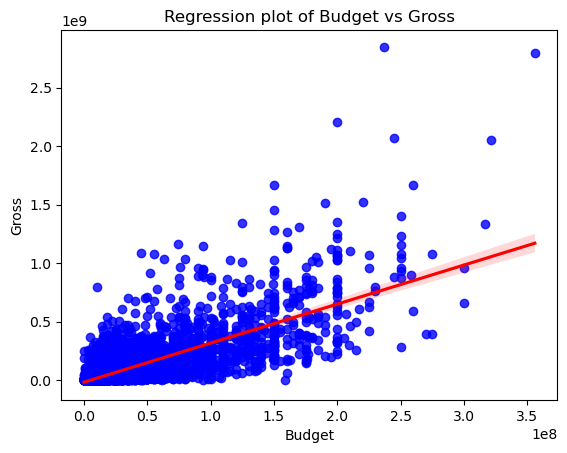

In [15]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Regression plot of Budget vs Gross')
plt.show()


In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

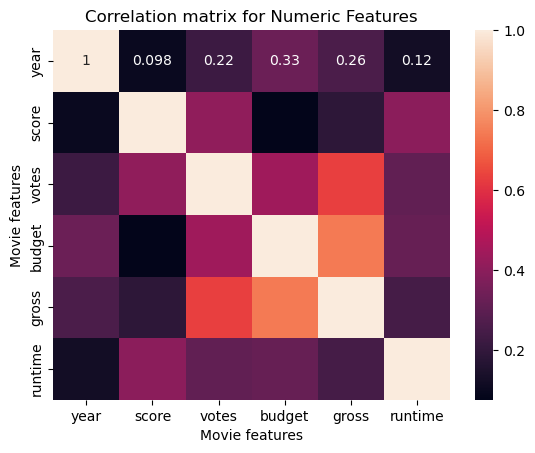

In [9]:

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()


# Use Sql query to select movies for a specific director

In [10]:
import pandas as pd
from sqlalchemy import create_engine

# Define the connection string for SQL Server with Windows Authentication
connection_string = 'mssql+pyodbc://@DESKTOP-AQRT76P\\SQLEXPRESS/Directors?driver=ODBC+Driver+17+for+SQL+Server'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)
query1 = "SELECT * FROM movies WHERE director='Stanley Kubrick'"
#query1 = "SELECT * FROM movies WHERE director LIKE 'S%'"
df = pd.read_sql(query1, engine)
df

movie_name rating  genre  movie_year                       released  \
0        The Shining      R  Drama        1980  June 13, 1980 (United States)   
1  Full Metal Jacket      R  Drama        1987  July 10, 1987 (United States)   
2     Eyes Wide Shut   None  Drama        1999  July 16, 1999 (United States)   

   score     votes         director           writer            star  \
0    8.4  927000.0  Stanley Kubrick     Stephen King  Jack Nicholson   
1    8.3  691000.0  Stanley Kubrick  Stanley Kubrick  Matthew Modine   
2    7.4  313000.0  Stanley Kubrick  Stanley Kubrick      Tom Cruise   

          country      budget        gross       company  runtime  
0  United Kingdom  19000000.0   46998772.0  Warner Bros.    146.0  
1  United Kingdom  30000000.0   46357676.0        Natant    116.0  
2  United Kingdom  65000000.0  162242684.0  Warner Bros.    159.0

# Using GUI Interface in filtering movies data and scraping wikipedia for more information about celebrities and displaying youtube trailer for the movie

In [12]:
import tkinter as tk
from tkinter import ttk
import pandas as pd
from sqlalchemy import create_engine
import requests
from bs4 import BeautifulSoup
import webbrowser
from pytube import Search
from tkinter import messagebox


# Define the connection string for SQL Server with Windows Authentication
connection_string = 'mssql+pyodbc://@DESKTOP-AQRT76P\\SQLEXPRESS/Directors?driver=ODBC+Driver+17+for+SQL+Server'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

#df = pd.read_csv(r'D:\Data Analysis\movies.csv')
query1 = "SELECT * FROM movies "
#query1 = "SELECT * FROM movies WHERE director LIKE 'S%'"
df = pd.read_sql(query1, engine)
#----------------------------------
# Function to update combo box values based on user input
def update_combo_values(event, combo_box, column_name):
    # Get the current text in the combo box and convert it to lowercase
    col_name = column_name
    typed_text = combo_box.get().lower()
    # Filter unique values based on typed text (ignoring case)
    filtered_values = [value.lower() for value in df[col_name].unique() if value and value.lower().startswith(typed_text)]
    # Update combo box values
    combo_box['values'] = filtered_values
    if (typed_text in combo_box['values'])or len(typed_text)==0:
        update_treeview(event)
    
#----------------------------------
# Function to update the Treeview based on combo box selection
def update_treeview(event=None):
    # Clear existing treeview items
    tree.delete(*tree.get_children())
    # Initialize the base query
    query2 = "SELECT * FROM movies WHERE 1=1"
    # Check if director_combo has a selected value
    if movie_combo.get():
        query2 += " AND movie_name='" + movie_combo.get() + "'"        

    if director_combo.get():
        query2 += " AND director='" + director_combo.get() + "'"        
    # Check if writer_combo has a selected value
    if writer_combo.get():
        query2 += " AND writer='" + writer_combo.get() + "'"
    if star_combo.get():
        query2 += " AND star='" + star_combo.get() + "'"
    if genre_combo.get():
        query2 += " AND genre='" + genre_combo.get() + "'"
    if year_combo.get():
        query2 += " AND movie_year='" + year_combo.get() + "'"
    if country_combo.get():
        query2 += " AND country='" + country_combo.get() + "'"        
    if company_combo.get():
        query2 += " AND company='" + company_combo.get() + "'"        

    # Filter DataFrame based on combo box selections
    filtered_df = pd.read_sql(query2, engine)
    
    # Insert filtered DataFrame rows as treeview items
    for i, row in filtered_df.iterrows():
        tree.insert("", "end", text=i, values=list(row))
#----------------------------------
def check_combo_value(event):
    combo_box = event.widget
    selected_text = combo_box.get()
    if (selected_text in combo_box['values'])or len(selected_text)==0:
        update_treeview(event)

#------------------------------------
# Create the main window
window = tk.Tk()
window.title("Movies Data")
window.geometry("1350x650+5+10")  # Shifted 50 pixels to the right

window.configure(bg='#ADD8E6')  # Light blue background
window.resizable(False, False)  # Disable window resizing

# Create frame1 for labels and combo boxes
frame1 = tk.Frame(window, width=1350, height=120, bg='#ADD8E6', relief="sunken", bd=2)  
frame1.grid(row=0, column=0, padx=2, pady=20, sticky="nsew")  # Adjusted row and added padx, pady, sticky options
frame1.grid_propagate(False)  # Prevent frame1 from adjusting its size based on its contents

# Create frame2 for the Treeview 
frame2 = tk.Frame(window, bg='#ADD8E6')
frame2.grid(row=1, column=0, columnspan=10, padx=5, pady=10, sticky="nsew")
# Create frame3 
frame3 = tk.Frame(window, bg='#ADD8E6')
frame3.grid(row=2, column=0, columnspan=10, padx=5, pady=10, sticky="nsew")
################################################################################
def scrape_celebrity_info(celebrity_name):
    url = f"https://en.wikipedia.org/wiki/{celebrity_name.replace(' ', '_')}"
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extract birthdate
        birthdate = None
        birthdate_tag = soup.find('span', {'class': 'bday'})
        if birthdate_tag:
            birthdate = birthdate_tag.text
        
        # Extract infobox
        infobox = "Infobox not found."
        infobox_data = []  # Create a list to store infobox data
        infobox_tag = soup.find('table', class_='infobox')
        if infobox_tag:
            rows = infobox_tag.find_all('tr')
            for row in rows:
                header = row.find('th')
                if header:
                    infobox_data.append(header.text.strip() + ': ')
                data = row.find('td')
                if data:
                    infobox_data.append(data.text.strip())
            infobox = '\n'.join(infobox_data)  # Concatenate list items into a single string
        
        return birthdate, infobox  # Return a tuple of two values
    
    return None, None
#-------------------------------------------

#*******************************************
def open_wiki(famous_name,combo_box):
    text_widget.delete(1.0, tk.END)
    typed_text = combo_box.get()
    if typed_text and (typed_text in combo_box['values']):
        text_widget.insert(tk.END, scrape_celebrity_info(typed_text))
    else:
        text_widget.insert(tk.END, "Please select a " + famous_name)
    
#******************************************
def fetch_trailer(movie_name):
    # Construct a search query to find the trailer on YouTube
    query = movie_name + " trailer"
    
    # Search for videos related to the query
    results = Search(query)
    
    if results.results:
        # Get the URL of the first result
        trailer_url = "https://www.youtube.com/watch?v=" + results.results[0].video_id
        return trailer_url
    else:
        return None
def display_trailer():
    typed_text = movie_combo.get()
    if typed_text in movie_combo['values']:   
        trailer_url = fetch_trailer(typed_text)
        if trailer_url:
           # Open the trailer URL in a webbrowser window
           webbrowser.open(trailer_url)

        else:
            messagebox.showinfo("Trailer Not Found", "Trailer not found")
#######################CREATING BUTTONS IN FRAME 1##############################

director_button = tk.Button(frame1, text="Director wiki", command=lambda: open_wiki('director', director_combo))
director_button.grid(row=2, column=1, pady=(10, 0), sticky="w") 

writer_button = tk.Button(frame1, text="Writer wiki", command=lambda: open_wiki('writer',writer_combo))
writer_button.grid(row=2, column=3, pady=(10, 0), sticky="w") 

star_button = tk.Button(frame1, text="Star wiki", command=lambda: open_wiki('star',star_combo))
star_button.grid(row=2, column=5, pady=(10, 0), sticky="w") 

movie_button = tk.Button(frame1, text="Movie Trailer", command=display_trailer)
movie_button.grid(row=0, column=3, pady=(10, 0)) 


##############################################################
text_widget = tk.Text(frame3, height=10, width=70)
text_widget.insert(tk.END, "Celebrity In Wikipedia ")
text_widget.grid(row=0,column=0)

#######################CREATING COMBO BOXES IN FRAME 1##############################
#1- Create combo box for movie 
movie_label = tk.Label(frame1, text="Movie:")
movie_label.grid(row=0, column=0, pady=(10, 0), sticky="w")

movie_combo = ttk.Combobox(frame1)
movie_combo.grid(row=0, column=1,padx=(0,0), pady=(10, 0))
movie_combo['values'] = df['movie_name'].unique().tolist()
movie_combo.bind('<KeyRelease>', lambda event: update_combo_values( event,movie_combo, 'movie_name'))
movie_combo.bind('<<ComboboxSelected>>', update_treeview)
movie_combo.bind("<FocusOut>", check_combo_value)
#------------------------

#-----------------------------------
#1- Create combo box for director 
director_label = tk.Label(frame1, text="Director:")
director_label.grid(row=1, column=0, pady=(10, 5), sticky="w")  # Aligns the label to the east (right)

director_combo = ttk.Combobox(frame1)
director_combo.grid(row=1, column=1, pady=(10, 5), )
director_combo['values'] = df['director'].unique().tolist()
# Bind the function to the combo box event for director_combo
director_combo.bind('<KeyRelease>', lambda event: update_combo_values( event,director_combo, 'director'))
director_combo.bind('<<ComboboxSelected>>', update_treeview)
director_combo.bind("<FocusOut>", check_combo_value)
#----------------------------------
# Create combo boxes for writer 
writer_label = tk.Label(frame1, text="Writer:")
writer_label.grid(row=1, column=2, pady=(10, 5))

writer_combo = ttk.Combobox(frame1)
writer_combo.grid(row=1, column=3, pady=(10, 5))
writer_combo['values'] = df['writer'].unique().tolist()
# Bind the function to the combo box event for writer_combo
writer_combo.bind('<KeyRelease>', lambda event: update_combo_values(event, writer_combo, 'writer'))
writer_combo.bind('<<ComboboxSelected>>', update_treeview)
writer_combo.bind("<FocusOut>", check_combo_value)

#----------------------------------
# Create combo boxes for the star 
star_label = tk.Label(frame1, text="Star:")
star_label.grid(row=1, column=4, pady=(10, 5))

star_combo = ttk.Combobox(frame1)
star_combo.grid(row=1, column=5, pady=(10, 5))
star_combo['values'] = df['star'].unique().tolist()
# Bind the function to the combo box event for star_combo
star_combo.bind('<KeyRelease>', lambda event: update_combo_values(event, star_combo, 'star'))
star_combo.bind('<<ComboboxSelected>>', update_treeview)
star_combo.bind("<FocusOut>", check_combo_value)

#----------------------------------
# Create combo boxes for the year 
year_label = tk.Label(frame1, text="Year:")
year_label.grid(row=1, column=6, pady=(10, 5))

year_combo = ttk.Combobox(frame1)
year_combo.grid(row=1, column=7, pady=(10, 5))
year_combo['values'] = df['movie_year'].unique().tolist()
year_combo.bind('<KeyRelease>', lambda event: update_treeview(event) if (year_combo.get() in year_combo['values']) or len(year_combo.get()) == 0 else None)
year_combo.bind('<<ComboboxSelected>>', update_treeview)
year_combo.bind("<FocusOut>", check_combo_value)

#----------------------------------
# Create combo boxes for the genre 
genre_label = tk.Label(frame1, text="Genre:")
genre_label.grid(row=1, column=8, padx=(5, 5), pady=(10, 5))

genre_combo = ttk.Combobox(frame1)
genre_combo.grid(row=1, column=9, pady=(10, 5))
genre_combo['values'] = df['genre'].unique().tolist()
genre_combo.bind('<KeyRelease>', lambda event: update_combo_values(event,genre_combo, 'genre'))
genre_combo.bind('<<ComboboxSelected>>', update_treeview)
genre_combo.bind("<FocusOut>", check_combo_value)
#----------------------------------
# Create combo boxes for the Country 
country_label = tk.Label(frame1, text="Country:")
country_label.grid(row=1, column=10, padx=(5, 5), pady=(10, 5))

country_combo = ttk.Combobox(frame1)
country_combo.grid(row=1, column=11, pady=(10, 5))
country_combo['values'] = df['country'].unique().tolist()
country_combo.bind('<KeyRelease>', lambda event: update_combo_values(event,country_combo, 'country'))
country_combo.bind('<<ComboboxSelected>>', update_treeview)
country_combo.bind("<FocusOut>", check_combo_value)
#----------------------------------
# Create combo boxes for the Company 
company_label = tk.Label(frame1, text="Company:")
company_label.grid(row=1, column=12, padx=(5, 5), pady=(10, 5))

company_combo = ttk.Combobox(frame1)
company_combo.grid(row=1, column=13, pady=(10, 5))
company_combo['values'] = df['company'].unique().tolist()
company_combo.bind('<KeyRelease>', lambda event: update_combo_values(event,company_combo, 'company'))
company_combo.bind('<<ComboboxSelected>>', update_treeview)
company_combo.bind("<FocusOut>", check_combo_value)
#----------------------------------

# Create a Treeview widget inside frame2
tree = ttk.Treeview(frame2)
tree.grid(row=0, column=0, columnspan=10, padx=10, pady=10, sticky="nsew")

# Insert DataFrame columns as treeview columns
tree["columns"] = list(df.columns)
tree.heading("#0", text="Index")
for column in df.columns:
    tree.heading(column, text=column)
    tree.column(column, width=100, anchor="center")  # Adjust width as needed

# Set the width of the index column
tree.column("#0", width=30)
tree.column("#2", width=30)
tree.column("#4", width=40)
tree.column("#6", width=30)

all_columns = tree['columns']
last_column = all_columns[-1]
tree.column(last_column, width=50)

# Insert DataFrame rows as treeview items
for i, row in df.iterrows():
    tree.insert("", "end", text=i, values=list(row))

# Add vertical scrollbar
vsb = ttk.Scrollbar(frame2, orient="vertical", command=tree.yview)
tree.configure(yscrollcommand=vsb.set)
vsb.grid(row=0, column=10, sticky='ns')

window.mainloop()








Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term: The Blue Lagoon trailer
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term: The Shining trailer
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
Unexpected renderer encountered.
Renderer name: dict_keys(['reelShelfRenderer'])
Search term: The Shining trailer
Please open an issue at https://github.com/pytube/pytube/issues and provide this log output.
